In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# Study data files
crop_production_path = "crop_production_clean.csv"
temp_file_path = "temperature_clean.csv"

In [11]:
crop_pro_results = pd.read_csv(crop_production_path,encoding="ISO-8859-1")
temp_read_results = pd.read_csv(temp_file_path,encoding="ISO-8859-1")
crop_pro_results =crop_pro_results[ ["Area","Item"] + list(crop_pro_results.loc[:,"Y1961":"Y2013"]) ]
crop_pro_results

#rename the columns for crop file 
renamed_crop_column=[]
for col in crop_pro_results.columns:
    renamed_crop_column.append(f'{col}_crop')
    
crop_pro_results.columns =renamed_crop_column


#compare with temp file country names
area_col=crop_pro_results["Area_crop"].unique()

In [12]:
# Temperature data set
temp_avg =temp_read_results[["AverageTemperature","year","Country"]]
temp_avg_df=pd.DataFrame(temp_avg).set_index("year")
temp_avg_df = temp_avg_df.reset_index()#.groupby("Country","year").AverageTemperature.mean()
temp_avg_grouped =pd.DataFrame(temp_avg_df).groupby(["Country","year"]).AverageTemperature.mean()
temp_avg_grouped=temp_avg_grouped.unstack()

#reset index to make country a column for merging
temp_avg_grouped=temp_avg_grouped.reset_index()


# Rename the columns for temp file
renamed_column =[]
for column in temp_avg_grouped.columns:
    renamed_column.append(f'{column}Temp')
    
temp_avg_grouped.columns =renamed_column
temp_avg_sorted=temp_avg_grouped.sort_values("CountryTemp")


#Rename country to match our country of focus
crop_country_list =temp_avg_sorted["CountryTemp"].values
for index,value in enumerate(crop_country_list):
    if value =="United States":#"United States of America"
        print(f'index:{index},value:{value}')
        #rename the country to match crop file for merging
        temp_avg_sorted["CountryTemp"][232]="United States of America"


index:232,value:United States


C:\Users\Liam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#Merge the two data sets
combined_crop_temp_df= crop_pro_results.merge(temp_avg_sorted, how ="outer",left_on='Area_crop', right_on="CountryTemp", suffixes=(False, False))
combined_crop_temp_df =combined_crop_temp_df.dropna()


In [14]:
# Crop production in the US
usa_prod_df = combined_crop_temp_df.loc[combined_crop_temp_df['Area_crop']=="United States of America"]
usa_prod_df =usa_prod_df.reset_index()

In [15]:
Tot_usa_prod_df =usa_prod_df[list(usa_prod_df.loc[:,"Area_crop":"Y2011_crop"])]
Tot_usa_prod_df["Results"]= Tot_usa_prod_df.apply(lambda column: column['Y1961_crop':'Y2011_crop'].sum(),axis = 1)
Tot_usa_prod_df.head()

C:\Users\Liam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Results
0,United States of America,Wheat and products,13439.0,13314.0,13320.0,13525.0,13510.0,13479.0,13717.0,13840.0,...,24801.0,24511.0,24869.0,25250.0,25793.0,25302.0,24959.0,25167.0,25050.0,980782.0
1,United States of America,Rice (Milled Equivalent),481.0,574.0,518.0,564.0,620.0,589.0,611.0,645.0,...,1827.0,1943.0,2021.0,2075.0,2104.0,2104.0,2118.0,2194.0,2127.0,68559.0
2,United States of America,Barley and products,131.0,131.0,152.0,152.0,152.0,152.0,180.0,174.0,...,153.0,158.0,152.0,162.0,164.0,169.0,166.0,167.0,164.0,7905.0
3,United States of America,Maize and products,1470.0,1499.0,1526.0,1570.0,1628.0,1714.0,1694.0,1489.0,...,3879.0,3879.0,3887.0,3887.0,3887.0,3887.0,3913.0,3954.0,3969.0,137191.0
4,United States of America,Rye and products,112.0,119.0,119.0,122.0,116.0,122.0,125.0,135.0,...,83.0,83.0,84.0,84.0,85.0,84.0,83.0,81.0,85.0,4255.0


In [16]:
#Sort by new total colum to pick to ten crops
sorted_Tot_usa_prod_df = Tot_usa_prod_df.sort_values(by=['Results'], ascending=False)

clean_df=sorted_Tot_usa_prod_df

In [17]:
#drop duplicates
remove_dup = clean_df.drop_duplicates()

remove_dup.reset_index().tail(5) 

,index,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,...,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Results
69,14,United States of America,Peas,59.0,102.0,92.0,95.0,57.0,64.0,47.0,...,122.0,267.0,245.0,204.0,281.0,211.0,302.0,140.0,2.0,4892.0
70,4,United States of America,Rye and products,112.0,119.0,119.0,122.0,116.0,122.0,125.0,...,83.0,83.0,84.0,84.0,85.0,84.0,83.0,81.0,85.0,4255.0
71,55,United States of America,"Marine Fish, Other",70.0,102.0,103.0,123.0,125.0,94.0,101.0,...,17.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,6.0,2590.0
72,15,United States of America,"Pulses, Other and products",10.0,25.0,27.0,37.0,3.0,8.0,1.0,...,55.0,83.0,111.0,38.0,62.0,27.0,104.0,203.0,84.0,1747.0
73,48,United States of America,Cream,138.0,240.0,207.0,183.0,168.0,137.0,109.0,...,2.0,3.0,11.0,9.0,13.0,11.0,13.0,0.0,0.0,1687.0


In [18]:
crop_summary = remove_dup.drop(['Results'], axis=1).groupby("Area_crop").mean().round(2)
crop_summary

,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,Y1969_crop,Y1970_crop,...,Y2002_crop,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop
Area_crop,,,,,,,,,,,,,,,,,,,,,
United States of America,3662.68,3713.26,3717.96,3816.18,3866.28,3979.91,4064.72,4160.68,4241.16,4311.76,...,7251.36,7327.62,7464.95,7361.23,7395.32,7457.46,7342.89,7349.81,7337.72,7287.69


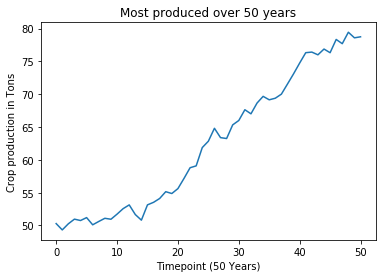

In [91]:
#Most produced crop in the US
fig, ax = plt.subplots()
yo=remove_dup.drop(['Area_crop',"Item_crop","Results"], axis=1).iloc[0]
val_list=[]
for val in yo:
    if val>0:
        val=val/1000
    val_list.append(val)

#ya1=np.arange(len(yo1))
ya=np.arange(len(yo))

plt.plot(ya,val_list)

plt.xlabel('Timepoint (50 Years)')
plt.ylabel('Crop production in Tons')
plt.title('Most produced over 50 years')
plt.show()
fig.savefig("MostProducedCrop.png")

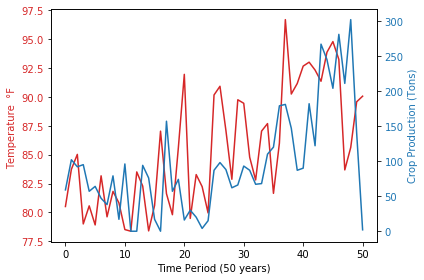

In [89]:
temp_data = pd.DataFrame(usa_prod_df)
temp_data.drop(temp_data.iloc[:, 3:57], inplace = True, axis = 1)
yo2=temp_data.drop(['Area_crop',"Item_crop","index"], axis=1).iloc[14]
val2_list=[]
for val2 in yo2:
    
    if val2>0:
        val2=(val2** (9/5) + 32 )
    val2_list.append(val2)


yo1=remove_dup.drop(['Area_crop',"Item_crop","Results"], axis=1).iloc[69]
val1_list=[]
for val1 in yo1:
    if val1>0:
        val1=val1/1000
    val1_list.append(val1)

ya=np.arange(len(yo1))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time Period (50 years)')
ax1.set_ylabel('Temperature  °F ', color=color)
ax1.plot(ya, val2_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Crop Production (Tons)', color=color)  # we already handled the x-label with ax1
ax2.plot(ya, yo1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig("tempVSCrop.png")